In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Objective

Develop a model that can predict whether a patient has Heart disease or not.

In [2]:
dataset = pd.read_csv('/content/heart_disease_data.csv')

# EDA(Exploratory Data Analysis)

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The data will have to be normalised.

In [5]:
dataset.shape

(303, 14)

768 rows and 9 columns.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No objects.

In [7]:
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No missing values.

<Axes: >

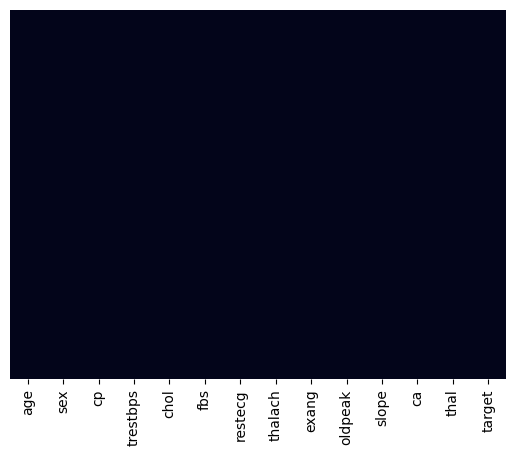

In [8]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

No missing values.

# Analyse the target 'Outcome'

In [9]:
dataset["target"].unique()

array([1, 0])

In [10]:
dataset['target'].value_counts()

,count
target,
1,165
0,138


* 1 - 300 people have Heart disease
* 0 - 200 people do not have Heart disease

Data is imbalanced.

# Check correlation of the features with the target 'Outcome'

In [11]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


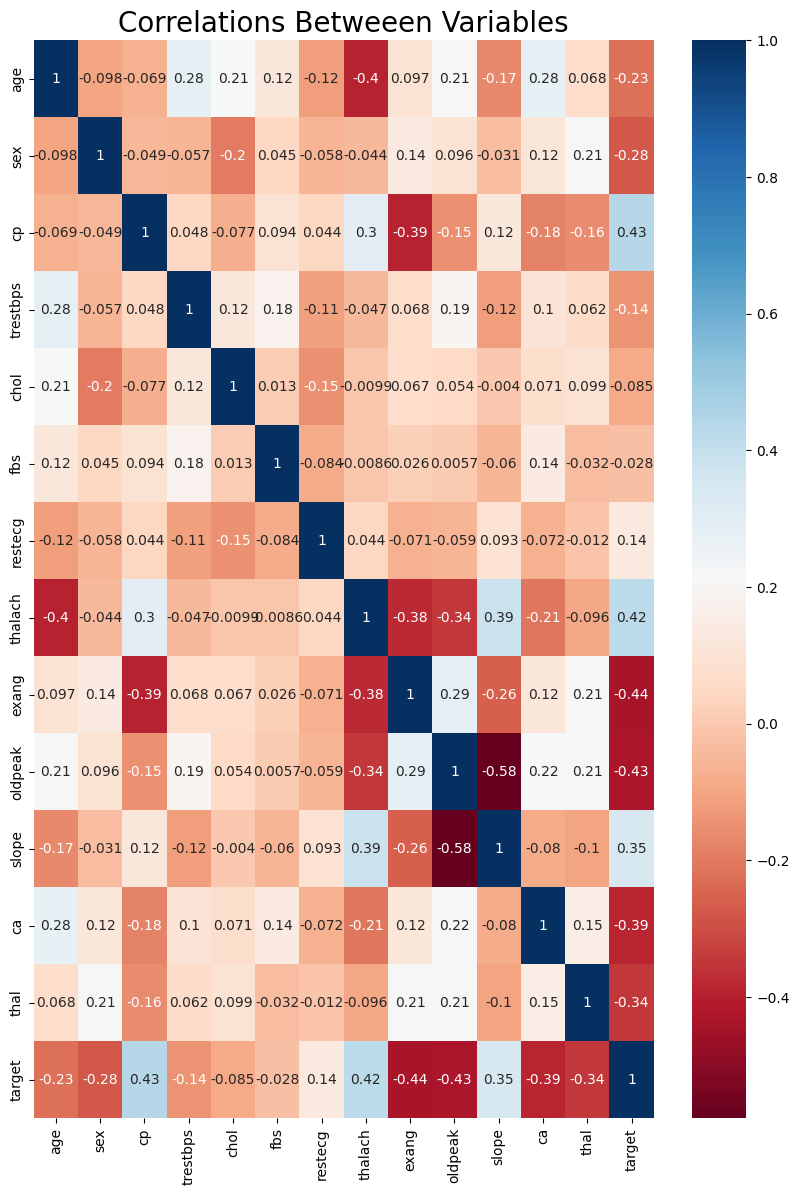

In [12]:
plt.figure(figsize=(10,14))
sns.heatmap(dataset.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

# DATA VISUALIZATION

In [13]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Figure size 200x200 with 0 Axes>

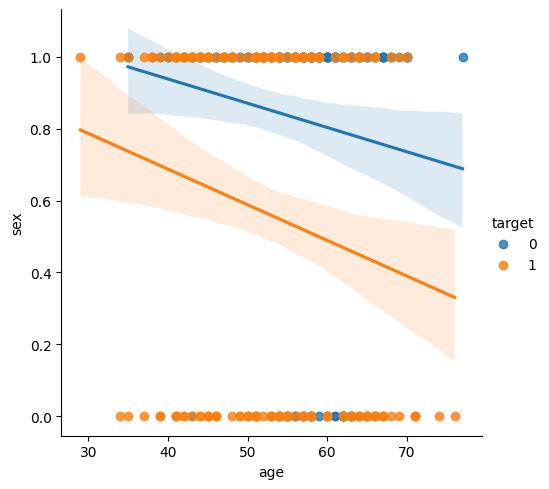

<Figure size 200x200 with 0 Axes>

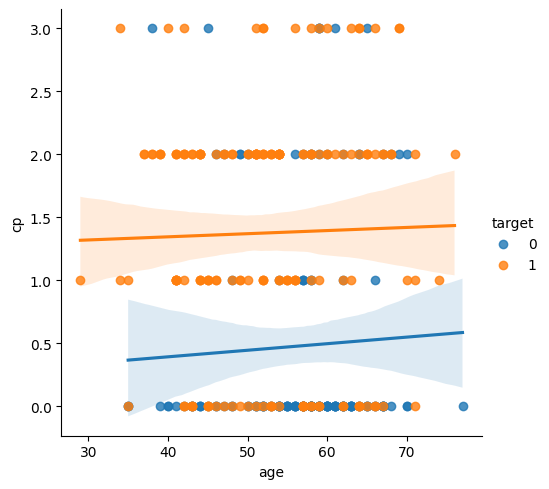

<Figure size 200x200 with 0 Axes>

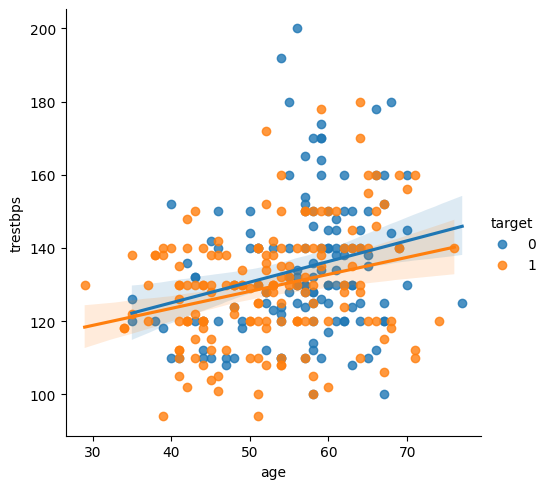

<Figure size 200x200 with 0 Axes>

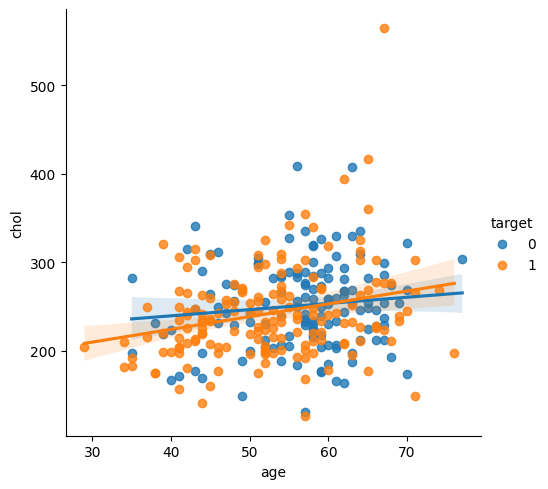

<Figure size 200x200 with 0 Axes>

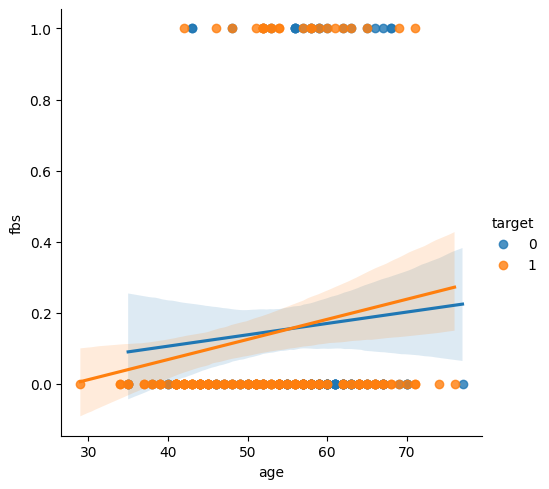

<Figure size 200x200 with 0 Axes>

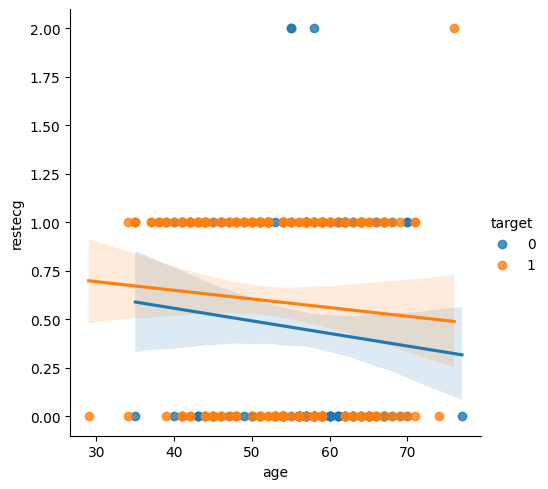

<Figure size 200x200 with 0 Axes>

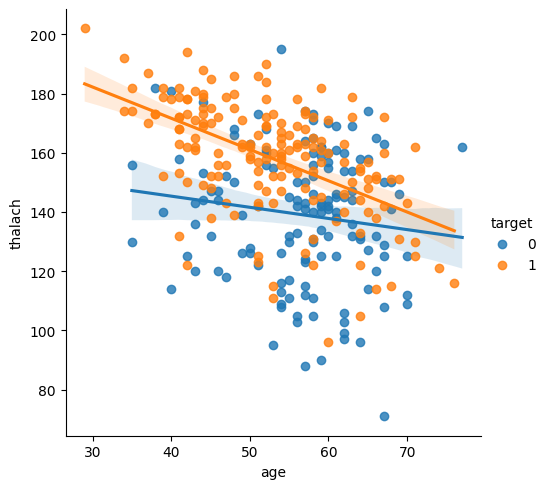

<Figure size 200x200 with 0 Axes>

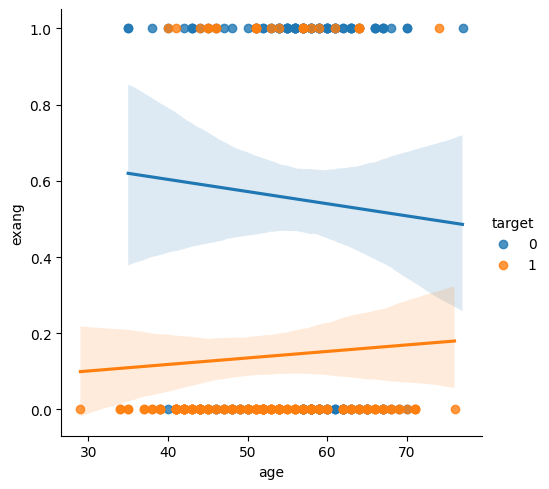

<Figure size 200x200 with 0 Axes>

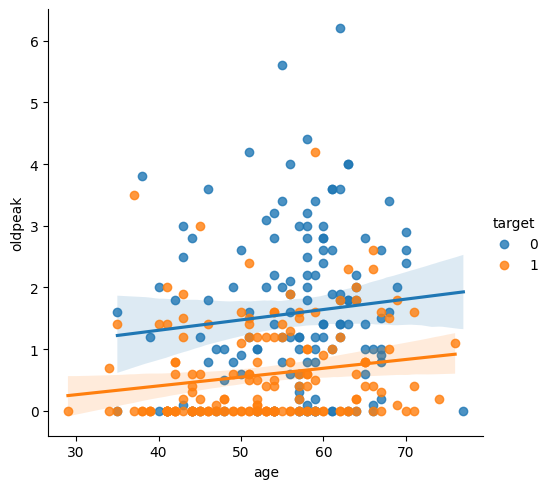

<Figure size 200x200 with 0 Axes>

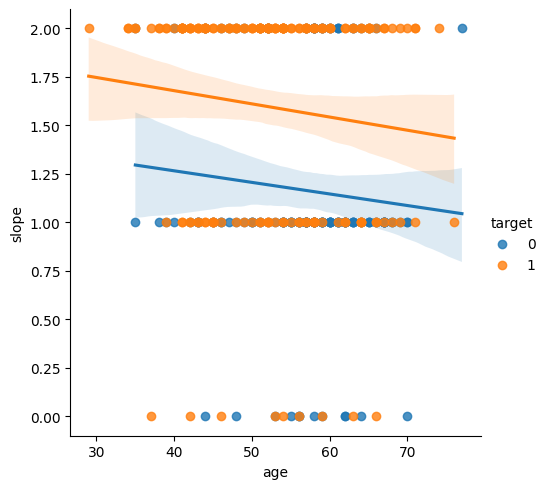

<Figure size 200x200 with 0 Axes>

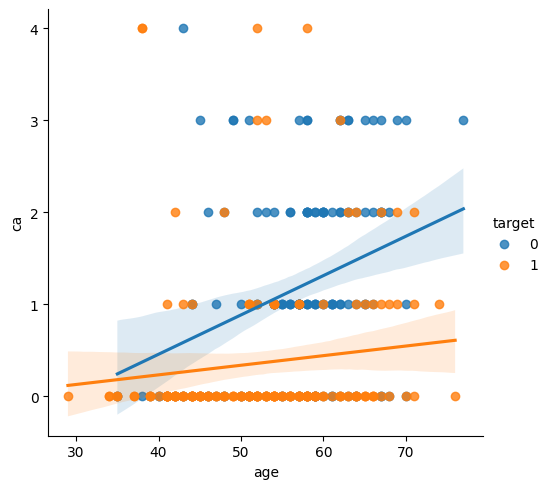

<Figure size 200x200 with 0 Axes>

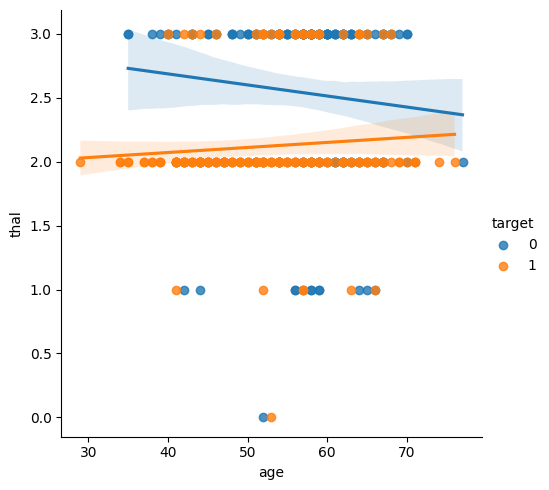

In [14]:
cols = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

for col in cols :
        plt.figure(figsize=(2,2))
        sns.lmplot(x="age", y=col, hue = "target", data=dataset)
plt.show()

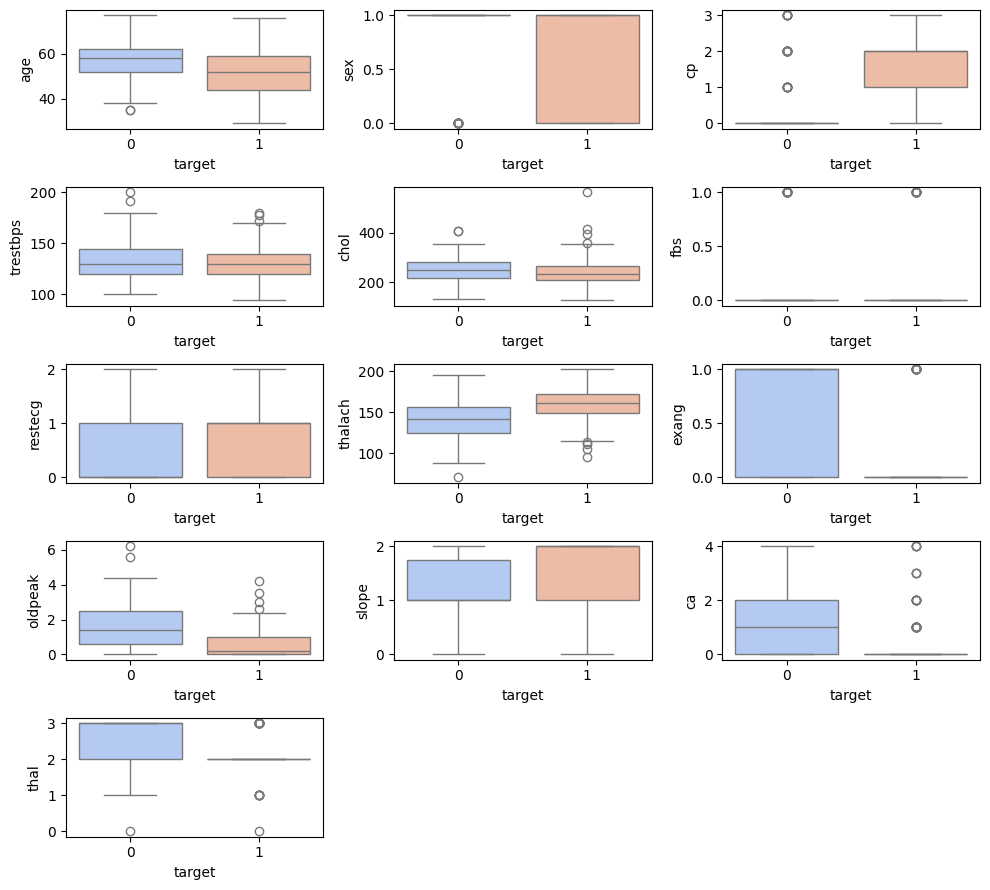

In [15]:
plt.figure(figsize=(10,9))
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
cnt=1
for col in cols :
        #plt.figure(figsize=(5,5))
        plt.subplot(5,3,cnt)
        sns.boxplot(x='target',y=col,data=dataset, palette='coolwarm')
        cnt= cnt+1
plt.tight_layout()
plt.show()

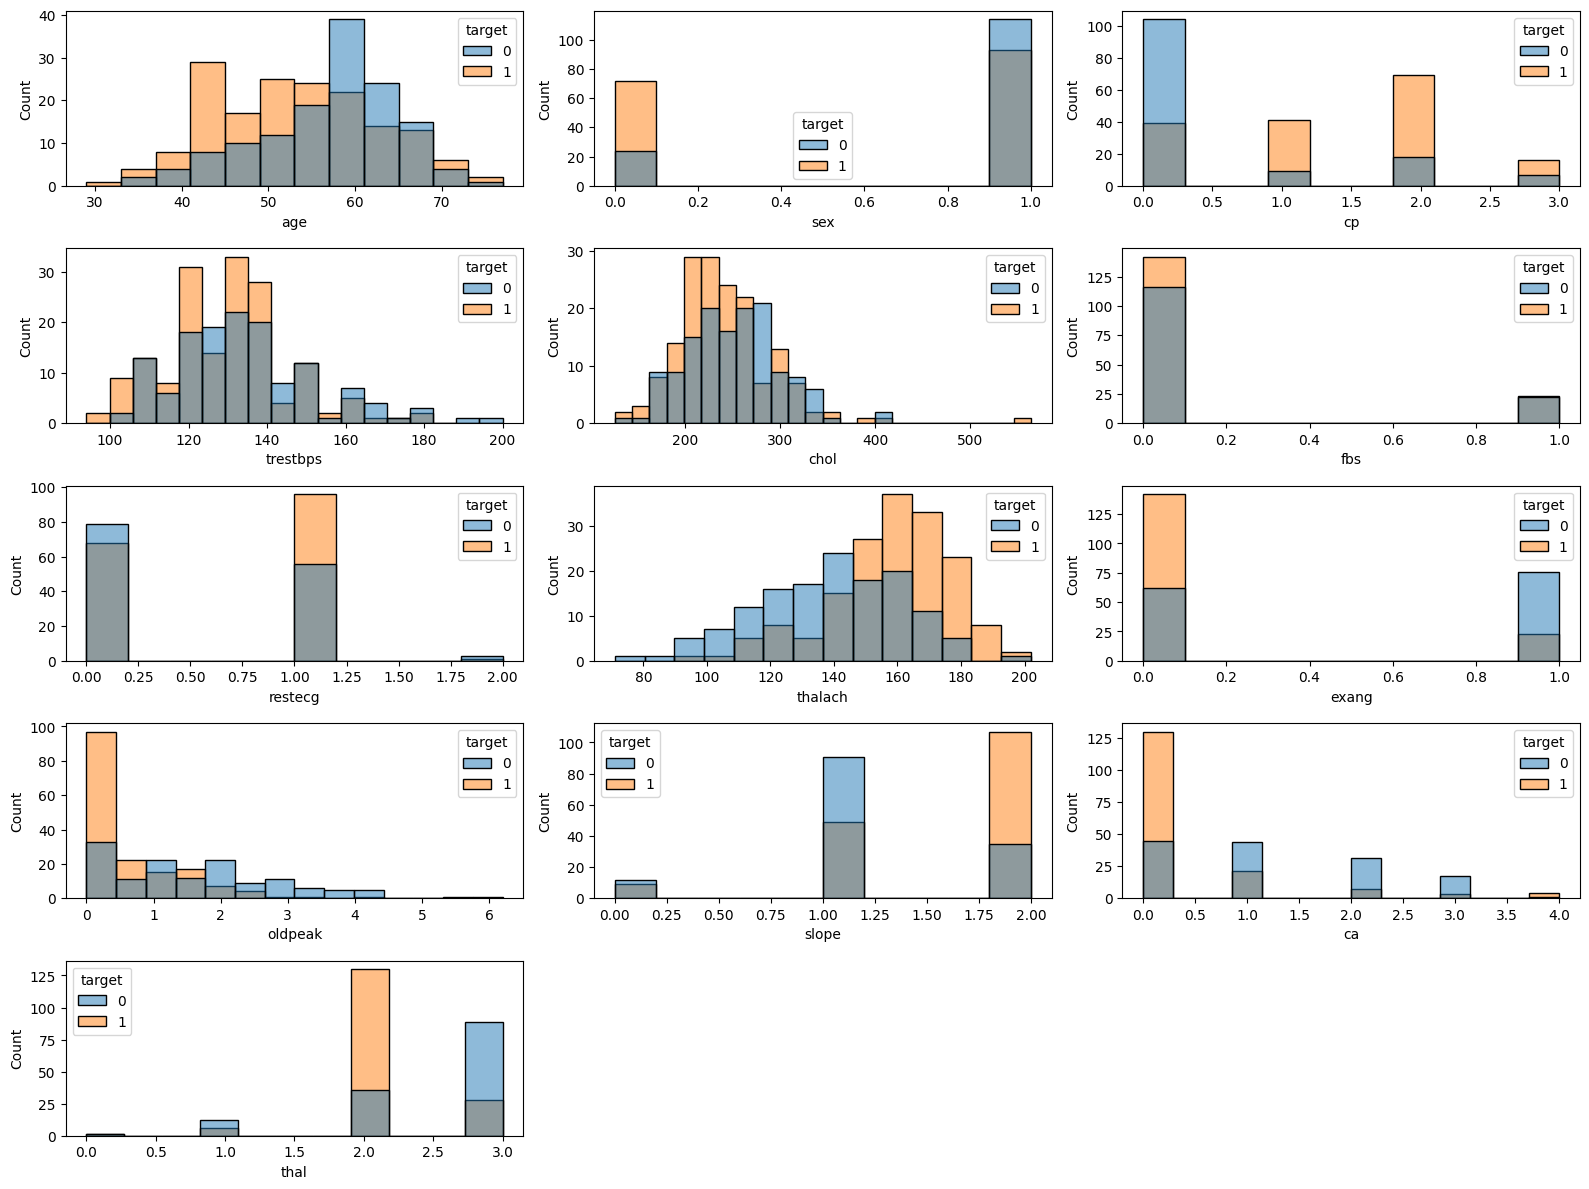

In [16]:
plt.figure(figsize=(16,12))
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
cnt=1
for col in cols :
        plt.subplot(5,3,cnt)
        sns.histplot(x = col, data = dataset, hue = "target")
        cnt= cnt+1
plt.tight_layout()
plt.show()

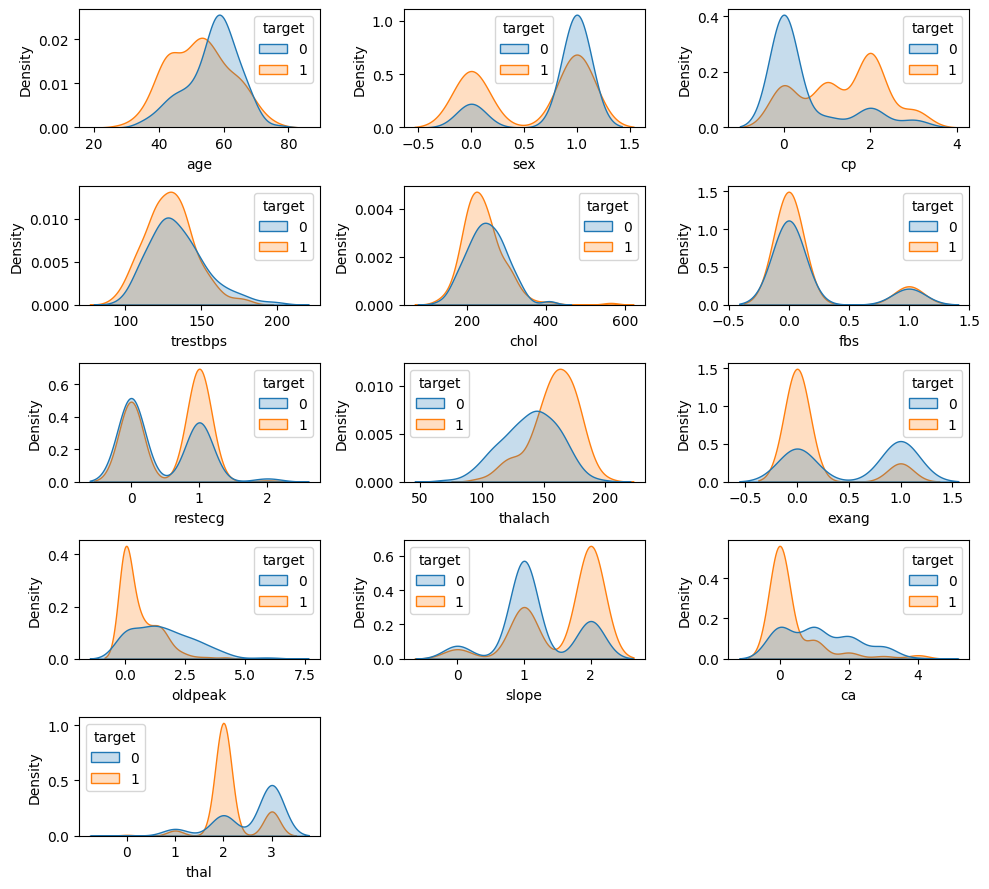

In [17]:
plt.figure(figsize=(10,9))
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
cnt=1
for col in cols :
        plt.subplot(5,3,cnt)
        #sns.histplot(x = col, data = df, hue = "Outcome")
        sns.kdeplot(data=dataset, x=col, hue='target', shade=True)
        cnt= cnt+1
plt.tight_layout()
plt.show()

In [18]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Set Up Features and Target

In [19]:
X = dataset.drop(['target'], axis = 1).values
y = dataset['target'].values

# Data Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


# Split the data into train and test data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# APPROACH 1 - MODELLING ON IMBALANCED DATA

The data will not be balanced in this approach before doing the modelling. The minority class is not up-sampled.

# 1. A Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 10000)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)

In [23]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1])

In [24]:
from sklearn.metrics import accuracy_score

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf)+" %")

The accuracy score achieved using the Random Forest model is: 79.12 %


# 2. A Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=31)

In [26]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1])

In [27]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt)+" %")

The accuracy score achieved using the Decision Tree model is: 76.92 %


# 3. A Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_model

LogisticRegression()

In [29]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [30]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(score_lr)+" %")

The accuracy score achieved using the Logistic Regression model is: 81.32 %


# 4. A SVC model

In [31]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [32]:
y_pred_svc = svc_model.predict(X_test)
y_pred_svc

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0])

In [33]:
score_svc = round(accuracy_score(y_pred_svc,y_test)*100,2)
print("The accuracy score achieved using the SVC model is: "+str(score_svc)+" %")

The accuracy score achieved using the SVC model is: 70.33 %


# 5. K Nearest Neighbors Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0])

In [36]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(score_knn)+" %")

The accuracy score achieved using the KNN model is: 67.03 %


# 6. A Naive Bayes Model

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [38]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1])

In [39]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb)+" %")

The accuracy score achieved using the Naive Bayes model is: 83.52 %


# 7. A XGBoost Model

In [40]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1])

In [42]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("The accuracy score achieved using the XGBoost model is: "+str(score_xgb)+" %")

The accuracy score achieved using the XGBoost model is: 81.32 %


# A Summary of the Scores

In [43]:
scores = [score_lr,score_nb,score_svc,score_knn,score_dt,score_rf,score_xgb] #,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 81.32 %
The accuracy score achieved using Naive Bayes is: 83.52 %
The accuracy score achieved using Support Vector Machine is: 70.33 %
The accuracy score achieved using K-Nearest Neighbors is: 67.03 %
The accuracy score achieved using Decision Tree is: 76.92 %
The accuracy score achieved using Random Forest is: 79.12 %
The accuracy score achieved using XGBoost is: 81.32 %


# A COMPARISON OF THE ACCURACY OF THE SEVEN MODELS

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

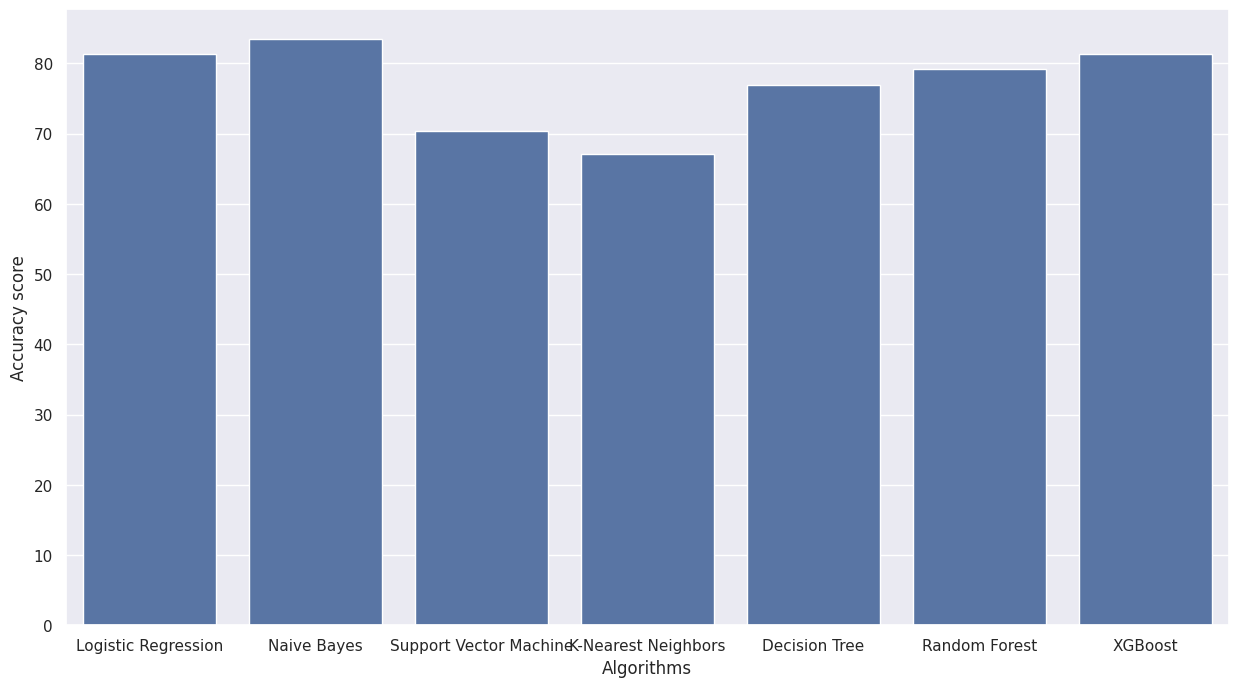

In [44]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

# Evaluation of the Random Forest Model

# Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

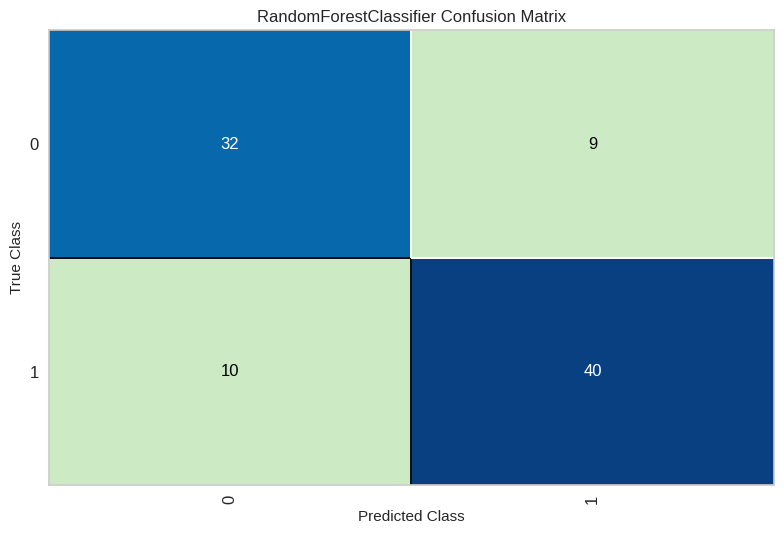

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
rf_cm = ConfusionMatrix(rf, cmap='GnBu')

rf_cm.fit(X_train, y_train)
rf_cm.score(X_test, y_test)
rf_cm.show()

# Classification Report

In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



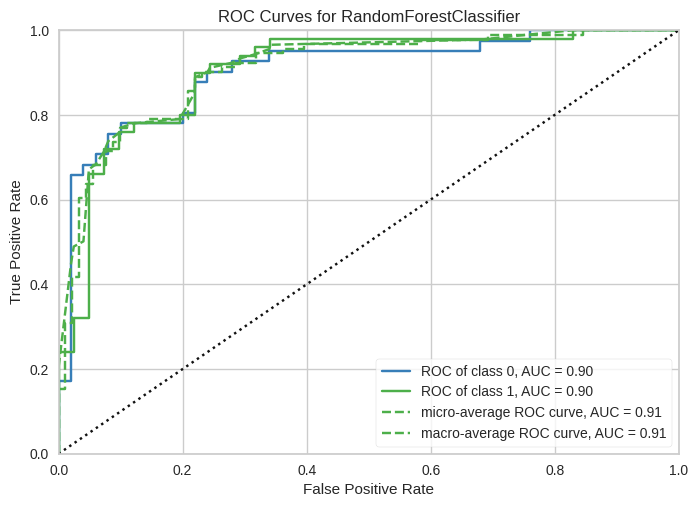

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
visualizer = ROCAUC(rf)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

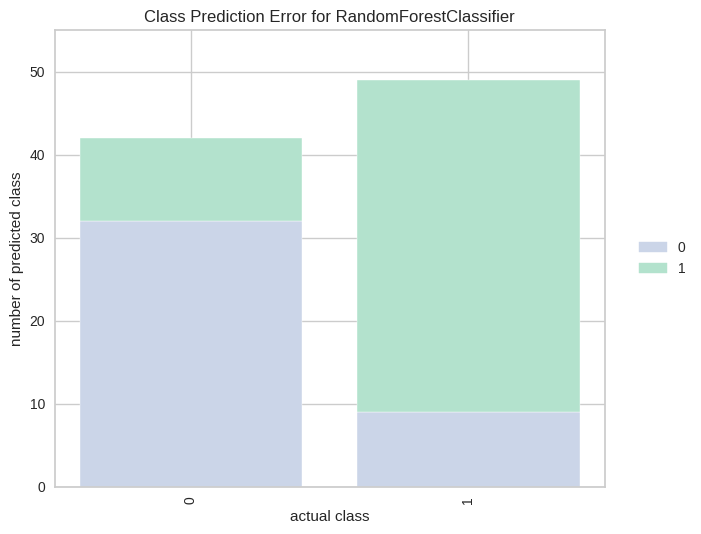

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [49]:
visualizer = ClassPredictionError(rf)

set_palette('pastel')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# APPROACH 2 - MODELLING ON BALANCED DATA

In this approach the data will be balanced before modelling. The minority class is up-sampled.

In [50]:
from sklearn.utils import resample

print(dataset['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


In [51]:
#Separate majority and minority classes
dataset_majority = dataset[dataset['target'] == 1]
dataset_minority = dataset[dataset['target'] == 0]

In [52]:
df_minority_upsampled = resample(dataset_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match average class
                                 random_state=42) # reproducible results

In [53]:
# Combine majority class with upsampled minority class
dataset_upsampled = pd.concat([dataset_majority, df_minority_upsampled])
print(dataset_upsampled['target'].value_counts())

target
0    500
1    165
Name: count, dtype: int64


In [54]:
Y_upsampled = dataset_upsampled["target"].values
Y_upsampled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
# Define the independent variables

X_upsampled = dataset_upsampled.drop(labels = ["target"], axis=1)
#X_upsampled = normalize(X_upsampled, axis=1)

In [56]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,
                                                                                            Y_upsampled,
                                                                                            test_size=0.2,
                                                                                            random_state=20)

# 1. A Random Forest Model

In [57]:
#Train again with new upsamples data
rf_upsampled = RandomForestClassifier(n_estimators = 56, random_state = 42)

# Train the model on training data
rf_upsampled.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(n_estimators=56, random_state=42)

In [58]:
y_pred_rf_upsampled = rf_upsampled.predict(X_test_upsampled)
y_pred_rf_upsampled

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1])

In [59]:
from sklearn.metrics import accuracy_score

score_rf_upsampled = round(accuracy_score(y_pred_rf_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the Random Forest model is: 96.24 %


# Confusion Matrix¶

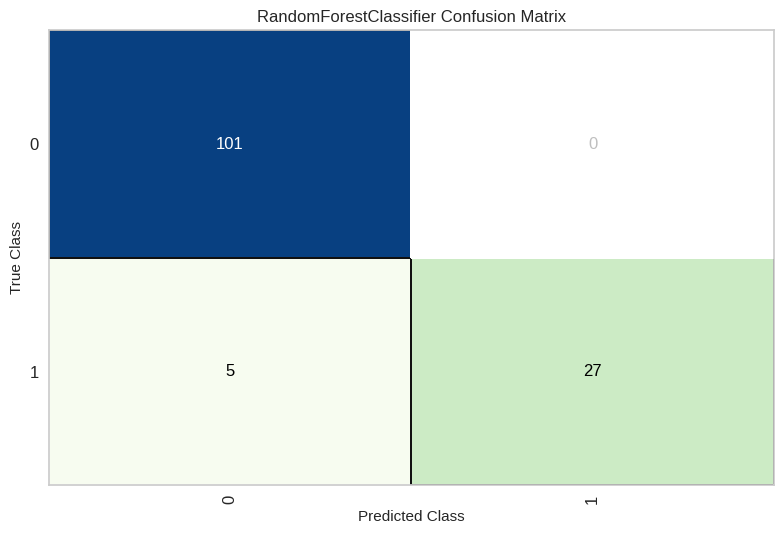

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [60]:
rf_upsampled_cm = ConfusionMatrix(rf_upsampled, cmap='GnBu')

rf_upsampled_cm.fit(X_train_upsampled, y_train_upsampled)
rf_upsampled_cm.score(X_test_upsampled, y_test_upsampled)
rf_upsampled_cm.show()

# Classification Report¶

In [61]:
print(classification_report(y_test_upsampled, y_pred_rf_upsampled))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       101
           1       1.00      0.84      0.92        32

    accuracy                           0.96       133
   macro avg       0.98      0.92      0.95       133
weighted avg       0.96      0.96      0.96       133



In [62]:
from sklearn.metrics import roc_auc_score

cm_upsampled = confusion_matrix(y_test_upsampled, y_pred_rf_upsampled)
print(cm_upsampled)

print("No diabetes =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0])*100)
print("With diabetes = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1])*100)


print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, y_pred_rf_upsampled)*100)

[[101   0]
 [  5  27]]
No diabetes =  =  95.28301886792453
With diabetes =  100.0
ROC_AUC score for balanced data using upsampling is:
92.1875


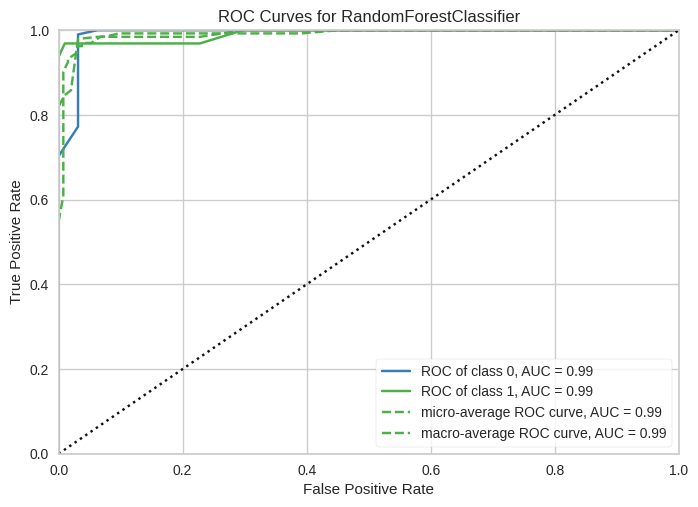

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
visualizer = ROCAUC(rf_upsampled)

set_palette('bold')

visualizer.fit(X_train_upsampled, y_train_upsampled)        # Fit the training data to the visualizer
visualizer.score(X_test_upsampled, y_test_upsampled)        # Evaluate the model on the test data
visualizer.show()

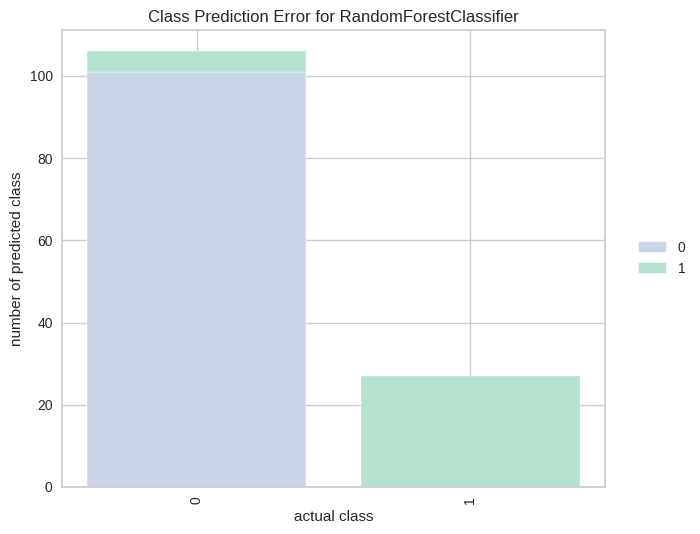

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [64]:
visualizer = ClassPredictionError(rf_upsampled)

set_palette('pastel')

visualizer.fit(X_train_upsampled, y_train_upsampled)
visualizer.score(X_test_upsampled, y_test_upsampled)
visualizer.show()

# 2. A Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(500):
    dt_upsampled = DecisionTreeClassifier(random_state=x)
    dt_upsampled.fit(X_train_upsampled,y_train_upsampled)
    y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
    current_accuracy = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

In [66]:
dt_upsampled = DecisionTreeClassifier(random_state=best_x)
dt_upsampled.fit(X_train_upsampled,y_train_upsampled)

DecisionTreeClassifier(random_state=15)

In [67]:
y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
y_pred_dt_upsampled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [68]:
score_dt_upsampled = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the Decision Tree model is: 91.73 %


# Confusion Matrix

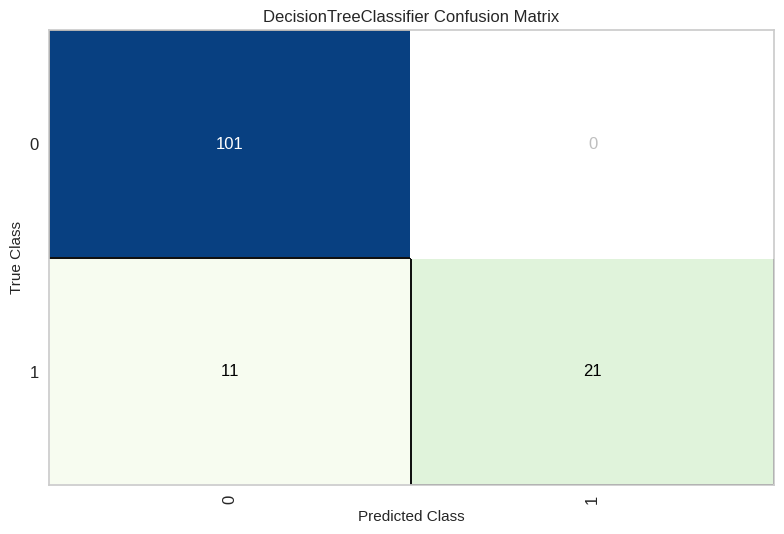

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [69]:
dt_upsampled_cm = ConfusionMatrix(dt_upsampled, cmap='GnBu')

dt_upsampled_cm.fit(X_train_upsampled, y_train_upsampled)
dt_upsampled_cm.score(X_test_upsampled, y_test_upsampled)
dt_upsampled_cm.show()

# Classification Report

In [70]:
print(classification_report(y_test_upsampled, y_pred_dt_upsampled))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       101
           1       1.00      0.66      0.79        32

    accuracy                           0.92       133
   macro avg       0.95      0.83      0.87       133
weighted avg       0.93      0.92      0.91       133



In [71]:
from sklearn.metrics import roc_auc_score

cm_upsampled = confusion_matrix(y_test_upsampled, y_pred_dt_upsampled)
print(cm_upsampled)

print("No Heart disease =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0])*100)
print("With Heart disease = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1])*100)


print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, y_pred_dt_upsampled)*100)

[[101   0]
 [ 11  21]]
No Heart disease =  =  90.17857142857143
With Heart disease =  100.0
ROC_AUC score for balanced data using upsampling is:
82.8125


# 3. A Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression

lr_model_upsampled = LogisticRegression(random_state=42, max_iter = 1000).fit(X_train_upsampled,y_train_upsampled)
lr_model_upsampled

LogisticRegression(max_iter=1000, random_state=42)

In [73]:
y_pred_lr_upsampled = lr_model_upsampled.predict(X_test_upsampled)
y_pred_lr_upsampled

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1])

In [74]:
score_lr_upsampled = round(accuracy_score(y_pred_lr_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the LogisticRegression model is: "+str(score_lr_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the LogisticRegression model is: 83.46 %


# 4. A SVM model

In [75]:
from sklearn.svm import SVC

svc_upsampled = SVC()
svc_upsampled.fit(X_train_upsampled,y_train_upsampled)

SVC()

In [76]:
y_pred_svc_upsampled = svc_upsampled.predict(X_test_upsampled)
y_pred_svc_upsampled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [77]:
score_svc_upsampled = round(accuracy_score(y_pred_svc_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the svm model is: "+str(score_svc_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the svm model is: 75.94 %


# 5. A XGBoost Model

In [78]:
import xgboost as xgb

xgb_upsampled = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_upsampled.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
y_pred_xgb_upsampled = xgb_upsampled.predict(X_test_upsampled)
y_pred_xgb_upsampled

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1])

In [80]:
score_xgb_upsampled = round(accuracy_score(y_pred_xgb_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the XGB model is: "+str(score_xgb_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the XGB model is: 96.99 %


# 6. A K Nearest Neighbors Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_upsampled,y_train_upsampled)

KNeighborsClassifier(n_neighbors=7)

In [82]:
y_pred_knn_upsampled = knn.predict(X_test_upsampled)
y_pred_knn_upsampled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [83]:
score_knn_upsampled = round(accuracy_score(y_pred_knn_upsampled,y_test_upsampled)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(score_knn_upsampled)+" %")

The accuracy score achieved using the KNN model is: 77.44 %


#  7. A Naive Bayes Model

In [84]:
from sklearn.naive_bayes import GaussianNB

nb_upsampled = GaussianNB()
nb_upsampled.fit(X_train_upsampled,y_train_upsampled)

GaussianNB()

In [85]:
y_pred_nb_upsampled = nb_upsampled.predict(X_test_upsampled)
y_pred_nb_upsampled

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1])

In [86]:
score_nb_upsampled = round(accuracy_score(y_pred_nb_upsampled,y_test_upsampled)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb_upsampled)+" %")

The accuracy score achieved using the Naive Bayes model is: 80.45 %


# A Summary of the Scores

In [87]:
scores = [score_lr_upsampled,score_svc_upsampled,score_dt_upsampled,score_rf_upsampled, score_xgb_upsampled,score_knn_upsampled, score_nb_upsampled]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest", "K-Nearest Neighbors", "Naive Bayes","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 83.46 %
The accuracy score achieved using Support Vector Machine is: 75.94 %
The accuracy score achieved using Decision Tree is: 91.73 %
The accuracy score achieved using Random Forest is: 96.24 %
The accuracy score achieved using K-Nearest Neighbors is: 96.99 %
The accuracy score achieved using Naive Bayes is: 77.44 %
The accuracy score achieved using XGBoost is: 80.45 %


# A COMPARISON OF THE ACCURACY OF THE SEVEN MODELS

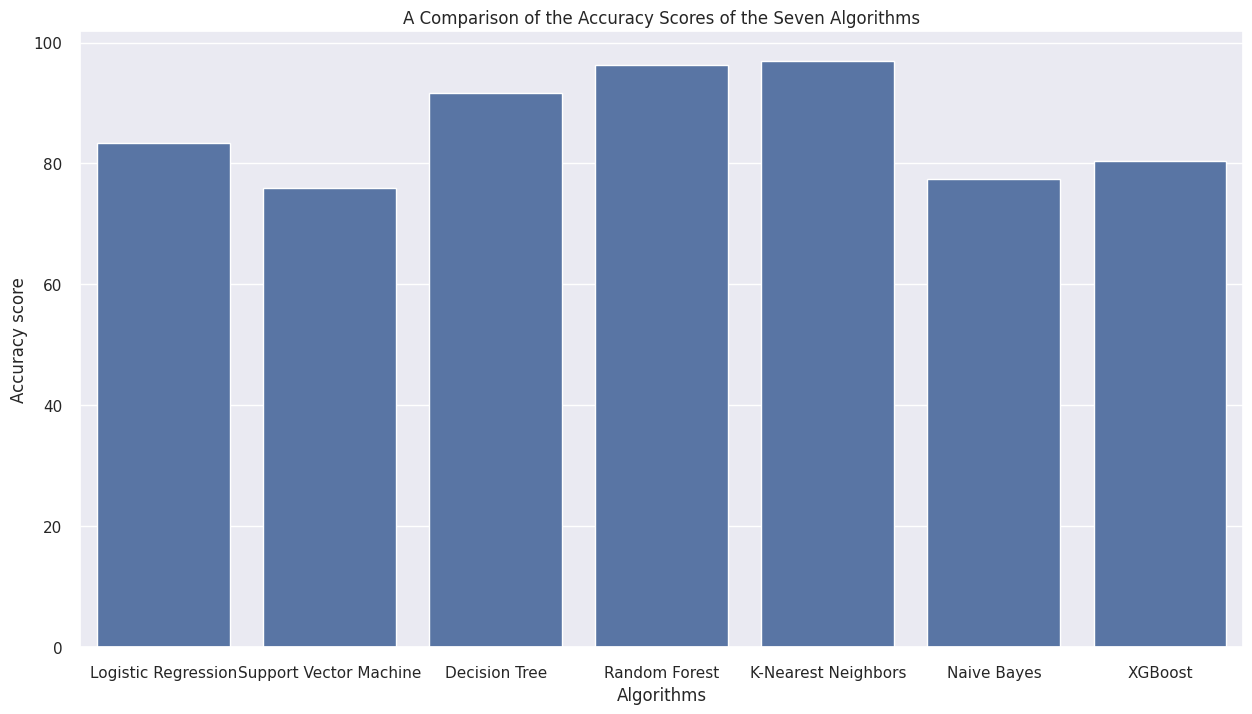

In [88]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)
plt.title("A Comparison of the Accuracy Scores of the Seven Algorithms")
plt.show()

# Making a predictive system

In [89]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_upsampled.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have heart disease')
else:
  print('The person has heart disease')

[1]
The person has heart disease


# Saving the trained model

In [90]:
import pickle

In [91]:
filename = 'Heart_model.sav'
pickle.dump(rf_upsampled, open(filename, 'wb'))

In [92]:
#loading the saved model
loaded_model = pickle.load(open('Heart_model.sav','rb'))

In [93]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_upsampled.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have heart disease')
else:
  print('The person has heart disease')

[1]
The person has heart disease
